In [68]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import glob
import os
from ripple_heterogeneity.utils import functions
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'
functions.set_plotting_defaults()

In [14]:

files = glob.glob(r"Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis/**/*.csv",recursive=True)

dirnames = [os.path.dirname(file) for file in files]
dirnames = np.unique(dirnames)

In [24]:
glob.glob(os.path.join(dirnames[0],"*.csv"))
# os.path.join(dirnames[0],"**.csv")

['Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\\CTBR1\\day1\\experiment_17\\experiment17_layerID.csv',
 'Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\\CTBR1\\day1\\experiment_17\\experiment_17_greencells.csv',
 'Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\\CTBR1\\day1\\experiment_17\\experiment_17_redcells.csv']

In [44]:
df = pd.DataFrame()
for dirname in dirnames:
    layer_id = pd.read_csv(glob.glob(os.path.join(dirname,"*layerID.csv"))[0])

    red_cells_file = glob.glob(os.path.join(dirname,"*redcells.csv"))
    green_cells_file = glob.glob(os.path.join(dirname,"*greencells.csv"))
    colabel_cells_file = glob.glob(os.path.join(dirname,"*colabel.csv"))

    if len(red_cells_file) > 0:
        df_temp = pd.read_csv(red_cells_file[0])
        df_temp["color"] = "red"
        df_temp["folder_name"] = dirname
        df = pd.concat([df,df_temp],ignore_index=True)

    if len(green_cells_file) > 0:
        df_temp = pd.read_csv(green_cells_file[0])
        df_temp["color"] = "green"
        df_temp["folder_name"] = dirname
        df = pd.concat([df,df_temp],ignore_index=True)

    if len(colabel_cells_file) > 0:
        df_temp = pd.read_csv(colabel_cells_file[0])
        df_temp["color"] = "co_label"
        df_temp["folder_name"] = dirname
        df = pd.concat([df,df_temp],ignore_index=True)

    df.loc[df.folder_name == dirname,"layer_rad_y"] = layer_id.Y.iloc[0]
    df.loc[df.folder_name == dirname,"layer_or_y"] = layer_id.Y.iloc[1]

df["normalized_dist"] = np.abs(df.Y - df.layer_rad_y) / abs(df.layer_rad_y - df.layer_or_y)
df

,,Area,Mean,Min,Max,X,Y,Ch,Slice,color,folder_name,layer_rad_y,layer_or_y,normalized_dist
0,1,0.0,5642,5642,5642,136.640,99.204,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.248804
1,2,0.0,3587,3587,3587,173.763,97.020,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.282301
2,3,0.0,2674,2674,2674,253.002,106.379,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.138758
3,4,0.0,5246,5246,5246,270.472,108.875,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.100475
4,5,0.0,8924,8924,8924,103.260,89.533,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.397132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,3,0.0,9152,9152,9152,514.315,199.976,1.0,6.0,green,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,241.504,153.975,0.474448
1145,4,0.0,5211,5211,5211,150.142,176.975,1.0,4.0,green,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,241.504,153.975,0.737230
1146,5,0.0,8086,8086,8086,575.649,217.865,2.0,3.0,green,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,241.504,153.975,0.270070
1147,6,0.0,7950,7950,7950,291.977,210.198,2.0,8.0,green,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,241.504,153.975,0.357664


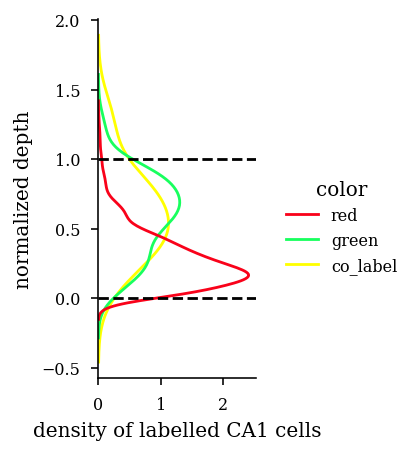

In [140]:
h,w = functions.set_size("thesis", fraction=.55, subplots=(1, 1))

group_colors = {"red": "#f9021a", "green": "#18ff5e","co_label":"yellow"}
sns.set_palette(sns.color_palette(group_colors.values()))

sns.displot(df, y="normalized_dist", hue="color",hue_order=group_colors, kind="kde", fill=False,common_norm=False,height=h,aspect=w/h,alpha=1)
plt.axhline(0,color="k",linestyle="--")
plt.axhline(1,color="k",linestyle="--")
plt.xlabel("density of labelled CA1 cells")
plt.ylabel("normalized depth")

plt.savefig(os.path.join(fig_save_path,'normalized_depth_labelled_ca1_cells.svg'),dpi=300,bbox_inches='tight')


In [145]:
df

,,Area,Mean,Min,Max,X,Y,Ch,Slice,color,folder_name,layer_rad_y,layer_or_y,normalized_dist
0,1,0.0,5642,5642,5642,136.640,99.204,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.248804
1,2,0.0,3587,3587,3587,173.763,97.020,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.282301
2,3,0.0,2674,2674,2674,253.002,106.379,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.138758
3,4,0.0,5246,5246,5246,270.472,108.875,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.100475
4,5,0.0,8924,8924,8924,103.260,89.533,1.0,13.0,red,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,115.426,50.226,0.397132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,3,0.0,9152,9152,9152,514.315,199.976,1.0,6.0,green,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,241.504,153.975,0.474448
1145,4,0.0,5211,5211,5211,150.142,176.975,1.0,4.0,green,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,241.504,153.975,0.737230
1146,5,0.0,8086,8086,8086,575.649,217.865,2.0,3.0,green,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,241.504,153.975,0.270070
1147,6,0.0,7950,7950,7950,291.977,210.198,2.0,8.0,green,Z:/home/Heath/Viral_tracing/CTB/CTBR_anlaysis\...,241.504,153.975,0.357664


In [146]:
from scipy.stats import ranksums
ranksums(df.query("color=='red'").normalized_dist,df.query("color=='green'").normalized_dist)

RanksumsResult(statistic=-10.551974750350835, pvalue=4.974050829156748e-26)

In [125]:
prop_df = df.groupby("color").apply(lambda x: pd.Series({"n_cells":len(x)})).reset_index()
prop_df["prop"] = prop_df.n_cells / prop_df.n_cells.sum()
prop_df["constant"] = 1

In [144]:
prop_df

,color,n_cells,prop,constant
0,co_label,10,0.008703,1
1,green,103,0.089643,1
2,red,1036,0.901654,1


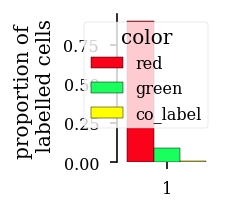

In [143]:
plt.figure(figsize = functions.set_size("thesis", fraction=.15, subplots=(2.5, 1)))

sns.barplot(data=prop_df,x="constant", hue="color", y="prop",hue_order=group_colors,edgecolor="k",saturation=1)
sns.despine(bottom=True)
plt.ylabel("proportion of \n labelled cells")
plt.xlabel("")
plt.savefig(os.path.join(fig_save_path,'prop_of_labelled_cells.svg'),dpi=300,bbox_inches='tight')
